In [1]:
import openseespy.opensees as ops

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Moment-curvature analysis of Grade A992 W14x132 steel section

In [3]:
# Assumed units: kip, in, ksi

# Material properties
Fy = 50.0
Es = 29000.0

# Section dimensions from Steel Manual
d = 10.1
bf = 10.0
tw = 0.370
tf = 0.615

# Axial load (positive is compression)
N = 0

## 1. Check WFSection Command for 10x54 Section

WARNING analysis Static - no Algorithm yet specified, 
 NewtonRaphson default will be used
WARNING analysis Static - no ConstraintHandler yet specified, 
 PlainHandler default will be used
WARNING analysis Static - no Numberer specified, 
 RCM default will be used
WARNING analysis Static - no LinearSOE specified, 
 ProfileSPDLinSOE default will be used


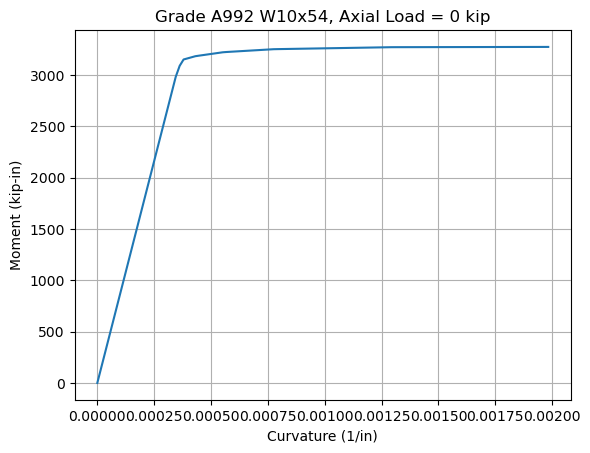

In [4]:
ops.wipe()
ops.model('basic','-ndm',2,'-ndf',3)

ops.node(1,0.0,0.0)
ops.node(2,0.0,0.0)

ops.fix(1,1,1,1)
ops.fix(2,0,1,0)

ops.uniaxialMaterial('Steel01',1,Fy,Es,0.0)

ops.section('WFSection2d',1,1,d,tw,bf,tf,10,2)

ops.element('zeroLengthSection',1,1,2,1)


ops.timeSeries('Constant',1)
ops.pattern('Plain',1,1)
ops.load(2,-N,0.0,0.0)

ops.integrator('LoadControl',0.0)
ops.analysis('Static')

ops.analyze(1)

epsY = Fy/Es
epsMax = 0.01

y = -0.5*d # depth to extreme tension fiber
e = ops.eleResponse(1,'section','deformation')
eps = e[0] - y*e[1]

ops.timeSeries('Linear',2)
ops.pattern('Plain',2,2)
ops.load(2,0.0,0.0,1.0)

deps = 0.01*epsY
ops.integrator('DisplacementControl',2,3,deps)

Mplot = np.zeros(1)
Kplot = np.zeros(1)

while eps < epsMax:
    ok = ops.analyze(1)
    if ok < 0:
        break
    
    e = ops.eleResponse(1,'section','deformation')
    eps = e[0] - y*e[1]
    
    Mplot = np.append(Mplot,ops.getLoadFactor(2))
    Kplot = np.append(Kplot,e[1])
    
plt.figure()
plt.plot(Kplot,Mplot)
plt.xlabel('Curvature (1/in)')
plt.ylabel('Moment (kip-in)')
plt.title('Grade A992 W10x54, Axial Load = %d kip' % N)
plt.grid()
plt.show()

### Check against values in Steel Manual

In [5]:
# Section and plastic modulus
S = 60
Z = 66.6

# Yield and plastic moment
My = Fy*S
Mp = Fy*Z

print('Yielding Moment from AISC = ', My)
print('Plastic Moment from AISC = ', Mp)

Yielding Moment from AISC =  3000.0
Plastic Moment from AISC =  3329.9999999999995


### Yielding and Plastic relatively match the graph output

## 2. Check Patch Command for Same Section

In [6]:
# Assumed units: kip, in, ksi

# Material properties
Fy = 50.0
Es = 29000.0
# Add v, G and J for part 3
v = 0.3
G = 0.5*Es/(1+v)
J = 1.82


# Section dimensions from Steel Manual
d = 10.1
bf = 10.0
tw = 0.370
tf = 0.615

# Axial load (positive is compression)
N = 0 



WARNING analysis Static - no Algorithm yet specified, 
 NewtonRaphson default will be used
WARNING analysis Static - no ConstraintHandler yet specified, 
 PlainHandler default will be used
WARNING analysis Static - no Numberer specified, 
 RCM default will be used
WARNING analysis Static - no LinearSOE specified, 
 ProfileSPDLinSOE default will be used


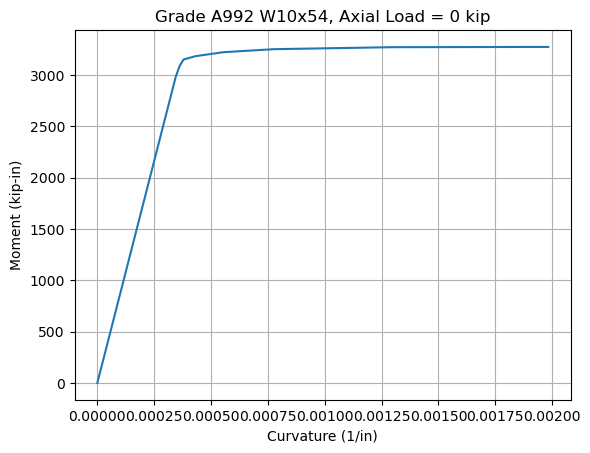

In [7]:
ops.wipe()
ops.model('basic','-ndm',2,'-ndf',3)

ops.node(1,0.0,0.0)
ops.node(2,0.0,0.0)

ops.fix(1,1,1,1)
ops.fix(2,0,1,0)

ops.uniaxialMaterial('Steel01',1,Fy,Es,0.0)

#ops.section('WFSection2d',1,1,d,tw,bf,tf,10,2)
ops.section('Fiber',1)
ops.patch('rect',1,2,1,0.5*d,0.5*bf,0.5*d-tf,-0.5*bf) # Top flange
ops.patch('rect',1,10,1,0.5*d-tf,0.5*tw,-0.5*d+tf,-0.5*tw) # Web
ops.patch('rect',1,2,1,-0.5*d+tf,0.5*bf,-0.5*d,-0.5*bf) # Bottom flange

ops.element('zeroLengthSection',1,1,2,1)


ops.timeSeries('Constant',1)
ops.pattern('Plain',1,1)
ops.load(2,-N,0.0,0.0)

ops.integrator('LoadControl',0.0)
ops.analysis('Static')

ops.analyze(1)

epsY = Fy/Es
epsMax = 0.01

y = -0.5*d # depth to extreme tension fiber
e = ops.eleResponse(1,'section','deformation')
eps = e[0] - y*e[1]

ops.timeSeries('Linear',2)
ops.pattern('Plain',2,2)
ops.load(2,0.0,0.0,1.0)

deps = 0.01*epsY
ops.integrator('DisplacementControl',2,3,deps)

Mplot = np.zeros(1)
Kplot = np.zeros(1)

while eps < epsMax:
    ok = ops.analyze(1)
    if ok < 0:
        break
    
    e = ops.eleResponse(1,'section','deformation')
    eps = e[0] - y*e[1]
    
    Mplot = np.append(Mplot,ops.getLoadFactor(2))
    Kplot = np.append(Kplot,e[1])
    
plt.figure()
plt.plot(Kplot,Mplot)
plt.xlabel('Curvature (1/in)')
plt.ylabel('Moment (kip-in)')
plt.title('Grade A992 W10x54, Axial Load = %d kip' % N)
plt.grid()
plt.show()

In [8]:
# Section and plastic modulus
S = 60
Z = 66.6

# Yield and plastic moment
My = Fy*S
Mp = Fy*Z

print('Yielding Moment from AISC = ', My)
print('Plastic Moment from AISC = ', Mp)

Yielding Moment from AISC =  3000.0
Plastic Moment from AISC =  3329.9999999999995


### Again, Yielding and Plastic relatively match the graph output

## 3. Check Patch Command for 3D section in weak axis

WARNING analysis Static - no Algorithm yet specified, 
 NewtonRaphson default will be used
WARNING analysis Static - no ConstraintHandler yet specified, 
 PlainHandler default will be used
WARNING analysis Static - no Numberer specified, 
 RCM default will be used
WARNING analysis Static - no LinearSOE specified, 
 ProfileSPDLinSOE default will be used


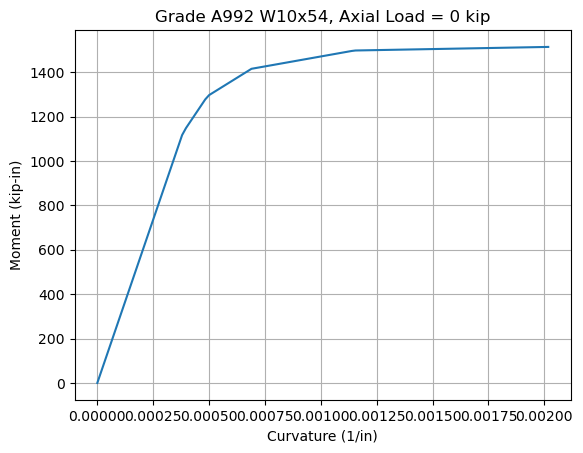

In [9]:
ops.wipe()
ops.model('basic','-ndm',3,'-ndf',6)

ops.node(1,0.0,0.0,0.0)
ops.node(2,0.0,0.0,0.0)

ops.fix(1,1,1,1,1,1,1)
ops.fix(2,0,1,1,0,0,0)

ops.uniaxialMaterial('Steel01',1,Fy,Es,0.0)


#ops.section('WFSection2d',1,1,d,tw,bf,tf,10,2)
ops.section('Fiber',1,'-GJ', G*J)
ops.patch('rect' , 1 , 10 , 2 , 10/2 , 10.1/2 , -10/2 , 10.1/2 - 0.615) # Top flange
ops.patch('rect',1 , 2 , 10 , 0.370/2 , 10.1/2 - 0.615 , -0.370/2 , -10.1/2 + 0.615)# Web
ops.patch('rect',1 , 10 , 2 , 10/2 , -10.1/2 + 0.615 , -10/2 , -10.1/2)

ops.element('zeroLengthSection',1,1,2,1)


ops.timeSeries('Constant',1)
ops.pattern('Plain',1,1)
ops.load(2,-N,0.0,0.0,0,0,0)

ops.integrator('LoadControl',0.0)
ops.analysis('Static')

ops.analyze(1)

epsY = Fy/Es
epsMax = 0.01

y = -0.5*bf # depth to extreme tension fiber
e = ops.eleResponse(1,'section','deformation')
eps = e[0] - y*e[1]

ops.timeSeries('Linear',2)
ops.pattern('Plain',2,2)
ops.load(2,0.0,0.0,0,0,0,1)

deps = 0.01*epsY
ops.integrator('DisplacementControl', 2, 6,deps)

Mplot = np.zeros(1)
Kplot = np.zeros(1)

while eps < epsMax:
    ok = ops.analyze(1)
    if ok < 0:
        break
    
    e = ops.eleResponse(1,'section','deformation')
    eps = e[0] - y*e[1]
    
    Mplot = np.append(Mplot,ops.getLoadFactor(2))
    Kplot = np.append(Kplot,e[1])
    
plt.figure()
plt.plot(Kplot,Mplot)
plt.xlabel('Curvature (1/in)')
plt.ylabel('Moment (kip-in)')
plt.title('Grade A992 W10x54, Axial Load = %d kip' % N)
plt.grid()
plt.show()

In [10]:
# Section and plastic modulus
S = 20.6
Z = 31.3

# Yield and plastic moment
My = Fy*S
Mp = Fy*Z

print('Yielding Moment from AISC = ', My)
print('Plastic Moment from AISC = ', Mp)

Yielding Moment from AISC =  1030.0
Plastic Moment from AISC =  1565.0


### Yielding and Plastic relatively match the graph output, however, the yielding is a little off compare to previous iterations. It is possoble with more slices it might be more accurate.